
# Pipeline used:

    1.Load pre-processed corpus (Number and stopword removal, stemming)
    
    2.Construct feature vector for documents (Train Doc2vec on train_set and get vector representation for each document in  both training and test set)
 
    3.Classfication using a train/test split (80/20 split)
    4.Vizualization

In [1]:
from sklearn.metrics import accuracy_score, confusion_matrix
import numpy as np
import matplotlib as plt

In [2]:
from gensim.test.utils import common_texts
from gensim.models.doc2vec import Doc2Vec, TaggedDocument
from sklearn.metrics import accuracy_score, f1_score
from sklearn.model_selection import train_test_split

C:\Users\billy\AppData\Local\Continuum\anaconda3\lib\site-packages\gensim\utils.py:1197: UserWarning: detected Windows; aliasing chunkize to chunkize_serial
  warnings.warn("detected Windows; aliasing chunkize to chunkize_serial")


In [3]:
from sklearn.linear_model import LogisticRegression
from sklearn import utils
import matplotlib.pyplot as plt
import csv
from tqdm import tqdm
import multiprocessing
import nltk
from nltk.corpus import stopwords
import pandas as pd
from sklearn import metrics

In [4]:
cores = multiprocessing.cpu_count()
cores #number of logical cores that can be leveraged.

12

In [5]:
df=pd.read_excel("processed_data_plus_labels.xlsx")

In [6]:
df

,Unnamed: 0,review,sentiment
0,0,teenag martha moxley maggi grace move highclas...,1
1,1,OK realli like kri kristofferson usual easi go...,0
2,2,spoiler read think watch movi although wast ti...,0
3,3,peopl seen wonder movi im sure thet like much ...,1
4,4,recent bought dvd forget much hate movi versio...,0
5,5,leav braik put good show final zorak live live...,1
6,6,nathan detroit frank sinatra manag new york lo...,1
7,7,understand crash cours right context must unde...,1
8,8,ive impress chavez stanc globalis sometim wasn...,1
9,9,movi direct renni harlin finnish miracl stallo...,1


In [7]:
df.columns

Index(['Unnamed: 0', 'review', 'sentiment'], dtype='object')

In [8]:
def tokenize_text(incoming_text):
    tokens = incoming_text.split(' ')
    return tokens

In [9]:
train_data, test_data = train_test_split(df, test_size=0.2, random_state=1,stratify=df['sentiment'])

In [10]:
#create tagged documents THIS WAY from DF --> TaggedDocument
train_tagged = train_data.apply(lambda sample: TaggedDocument(words=tokenize_text(sample['review']), tags=[sample.sentiment]), axis=1)
test_tagged = test_data.apply(lambda sample: TaggedDocument(words=tokenize_text(sample['review']), tags=[sample.sentiment]), axis=1)

In [11]:
type(train_tagged)
type(test_tagged)

pandas.core.series.Series

In [12]:
train_tagged.iloc[0]

TaggedDocument(words=['saw', 'last', 'night', 'tribeca', 'film', 'fest', 'holi', 'god', 'bad', 'script', 'edit', 'act', 'cinematographi', 'none', 'work', 'mention', 'set', 'designcostum', 'distractingli', 'wrong', 'time', 'period', 'span', 'year', 'late', '70', 'even', 'john', 'hurt', 'who', 'usual', 'amaz', 'actor', 'overth', 'top', 'ridicul', 'grant', 'quinten', 'crisp', 'overthetop', 'guy', 'begin', 'hurt', 'given', 'noth', 'work', 'dont', 'know', 'much', 'els', 'say', 'except', 'audienc', 'saw', 'absolut', 'love', 'mayb', 'audienc', 'love', 'anyth', 'film', 'festiv', 'theyr', 'sit', 'next', 'director', 'actor', 'accur', 'test', 'good', 'movi', 'well', 'play', 'person', 'thought', 'movi', 'terribl', 'hand', 'terribl', 'hilari', 'get', 'drunk', 'give', 'shot', 'hbo', 'year', 'ever', 'make', 'far'], tags=[0])

In [13]:
test_tagged.iloc[0]

TaggedDocument(words=['read', 'user', 'comment', 'happi', 'someon', 'compar', 'origin', 'kamal', 'call', 'perumarzhakalam', 'releas', '2004br', 'br', 'origin', 'tight', 'stori', 'loophol', 'describ', 'indian', 'govt', 'proper', 'record', 'even', 'bad', 'shoot', 'bloopersbr', 'br', 'stori', 'great', 'touchi', 'one', 'well', 'describ', 'other', 'sadli', 'nagesh', 'take', 'credit', 'stori', 'sad', 'thing', 'amount', 'noth', 'plagiarismbr', 'br', 'guess', 'affect', 'bollywood', 'call', 'inspir', 'syndromebr', 'br', 'must', 'least', 'give', 'credit', 'duebr', 'br', 'like', 'older', 'movi', 'suspect', 'origin', 'allbr', 'br', 'link', 'imdb', 'origin', 'masterpiec', 'httpwwwimdbcomtitlett0425350com', 'recommend', 'see', 'origin', 'even', 'subtitl', 'need', 'know', 'class', 'direct', 'class', 'act'], tags=[0])

Interesting thing about doc2vec is that we need to run gradient descent during prediction to infer the vector for an unseen document. An unseen document is initially assigned a random vector and then this vector fit by gradient descent. Because of this randomness we get different vectors on re-runs of the next cell.
Consequently, the accuracy of logistic regression changes when the test set vectors change.

# Doc2Vec model training 

In [14]:
train_set = train_tagged.values #TaggedDocument format for training documents
test_set = test_tagged.values  #TaggedDocument format for testing documents

In [15]:
%%time

# simple gensim doc2vec api--train the DOC2Vec Model, the model is trained only on training documents
doc2vec_model = Doc2Vec(train_set, workers=11, size=100, iter=10, dm=1) #the simplest indedeed

#Doc2Vec(reviews, vector_size=5, window=2, min_count=1, workers=4)  so many parameters...
#Doc2Vec(documents, vector_size=100, window=3, min_count=2, workers=11,epochs=20)


C:\Users\billy\AppData\Local\Continuum\anaconda3\lib\site-packages\gensim\models\doc2vec.py:362: UserWarning: The parameter `iter` is deprecated, will be removed in 4.0.0, use `epochs` instead.
  warnings.warn("The parameter `iter` is deprecated, will be removed in 4.0.0, use `epochs` instead.")
C:\Users\billy\AppData\Local\Continuum\anaconda3\lib\site-packages\gensim\models\doc2vec.py:366: UserWarning: The parameter `size` is deprecated, will be removed in 4.0.0, use `vector_size` instead.
  warnings.warn("The parameter `size` is deprecated, will be removed in 4.0.0, use `vector_size` instead.")


Wall time: 44.2 s


# Construct feature vectors

In [16]:
#get training vectors 
#train_targets, train_regressors = zip(*[(doc.tags[0], doc2vec_model.infer_vector(doc.words, steps=20)) for doc in train_set])

train_vectors = [doc2vec_model.infer_vector(document.words, steps=10) for document in train_set]


#get test vectors 
#test_targets, test_regressors = zip(*[(doc.tags[0], doc2vec_model.infer_vector(doc.words, steps=20)) for doc in test_set])

test_vectors = [doc2vec_model.infer_vector(document.words, steps=10) for document in test_set]

In [17]:
len(train_vectors[0])  #feature vectors of lenght 100

100

In [18]:
len(test_vectors[0]) 

100

# Training the Logistic classifier.

In [19]:
model= LogisticRegression(n_jobs=-1)
model.fit(train_vectors, train_data["sentiment"] ) #train_regressors --> train_vectors, train_targets--> targets
#evaluate_prediction(logreg.predict(test_regressors), test_targets, title=str(doc2vec_model))

C:\Users\billy\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\billy\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:1544: UserWarning: 'n_jobs' > 1 does not have any effect when 'solver' is set to 'liblinear'. Got 'n_jobs' = 12.
  " = {}.".format(effective_n_jobs(self.n_jobs)))


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='warn', n_jobs=-1, penalty='l2',
                   random_state=None, solver='warn', tol=0.0001, verbose=0,
                   warm_start=False)

In [20]:
model.score(train_vectors,train_data["sentiment"]) #training accuracy

0.86905

# Testing the Logistic classifier.

In [21]:
model.score(test_vectors,test_data["sentiment"]) #testing accuracy

0.8225

In [22]:
predicted_labels=model.predict(test_vectors)
names=test_data["sentiment"].unique()

In [23]:
print(metrics.classification_report(test_data["sentiment"], predicted_labels,test_data["sentiment"].unique()))

              precision    recall  f1-score   support

           0       0.82      0.82      0.82      5000
           1       0.82      0.82      0.82      5000

    accuracy                           0.82     10000
   macro avg       0.82      0.82      0.82     10000
weighted avg       0.82      0.82      0.82     10000



In [25]:
metrics.confusion_matrix(test_data["sentiment"], predicted_labels)

array([[4104,  896],
       [ 879, 4121]], dtype=int64)

# Vizualization of documents with t-snea

__Vizualize a subest of the training and test data, since a vizualtion of 50k documents is not an option__

In [29]:
viz_vectors_train=train_vectors[:1000]
viz_labels_train=train_data['sentiment'].values[:1000]

viz_vectors_test=test_vectors[:1000]
viz_labels_test=test_data['sentiment'].values[:1000]

In [30]:
len(viz_vectors_train)

1000

In [31]:
len(viz_vectors_test)

1000

In [32]:
from yellowbrick.text import TSNEVisualizer

'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.
'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.


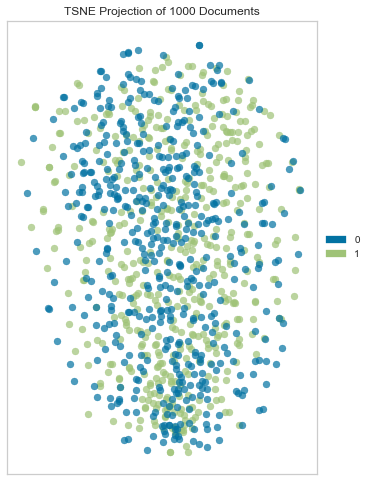

In [33]:
# Create the visualizer and draw the vectors
tsne = TSNEVisualizer(random_state=1,size=(500,600))    
tsne.fit(viz_vectors_train,viz_labels_train)  #Train documents vizualization
tsne.show()

'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.
'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.


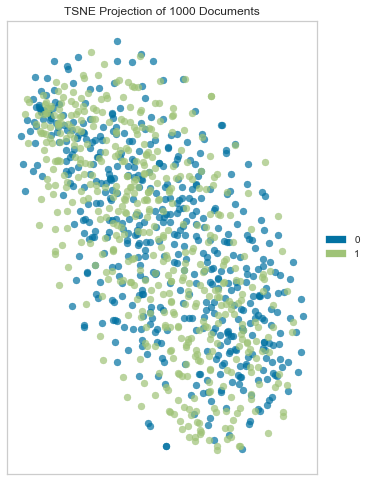

In [34]:
# Create the visualizer and draw the vectors
tsne = TSNEVisualizer(random_state=1,size=(500,600))
tsne.fit(viz_vectors_test,viz_labels_test)
tsne.show()

# Second Vizualization of the Train Dataset and of the Test Dataset

In [35]:
from sklearn.manifold import TSNE

In [36]:
tsne_model = TSNE(perplexity=30, n_components=2, init='pca', n_iter=5000)

In [37]:
new_values = tsne_model.fit_transform(viz_vectors_train)

In [38]:
x = []
y = []
for value in new_values:
    x.append(value[0])
    y.append(value[1])

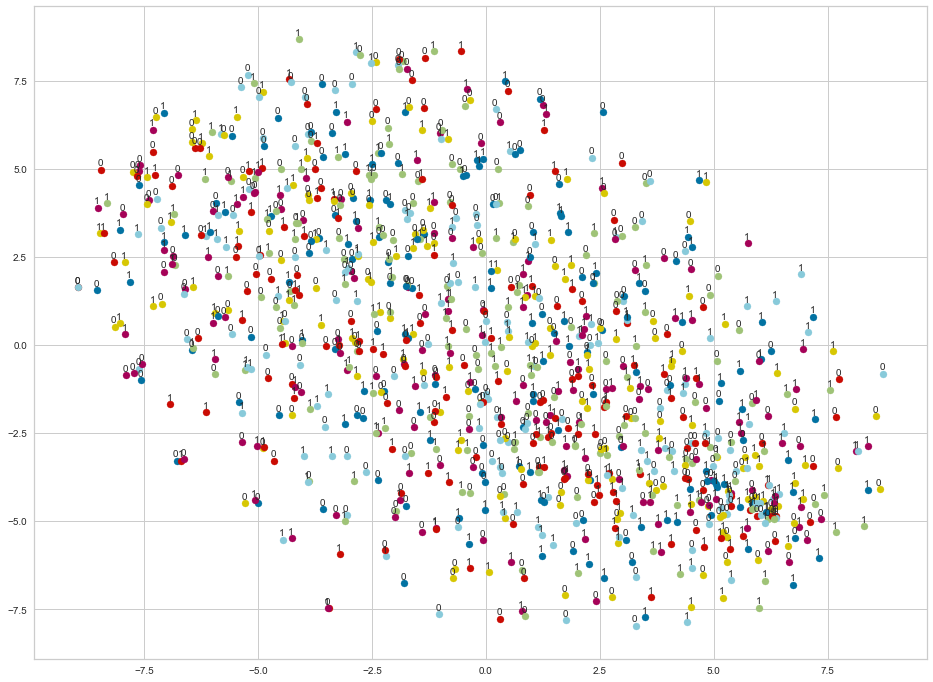

In [59]:

plt.figure(figsize=(16, 12)) 
for i in range(len(x)):
    plt.scatter(x[i],y[i],cmap='hsv')
    plt.annotate(viz_labels_train[i],
                 xy=(x[i], y[i]),
                 xytext=(2, 2),
                 textcoords='offset points',
                 ha='right',
                 va='bottom')
plt.show()

In [42]:
tsne_model = TSNE(perplexity=30, n_components=2, init='pca', n_iter=1000)

In [43]:
new_values = tsne_model.fit_transform(viz_vectors_test)

In [44]:
x = []
y = []
for value in new_values:
    x.append(value[0])
    y.append(value[1])

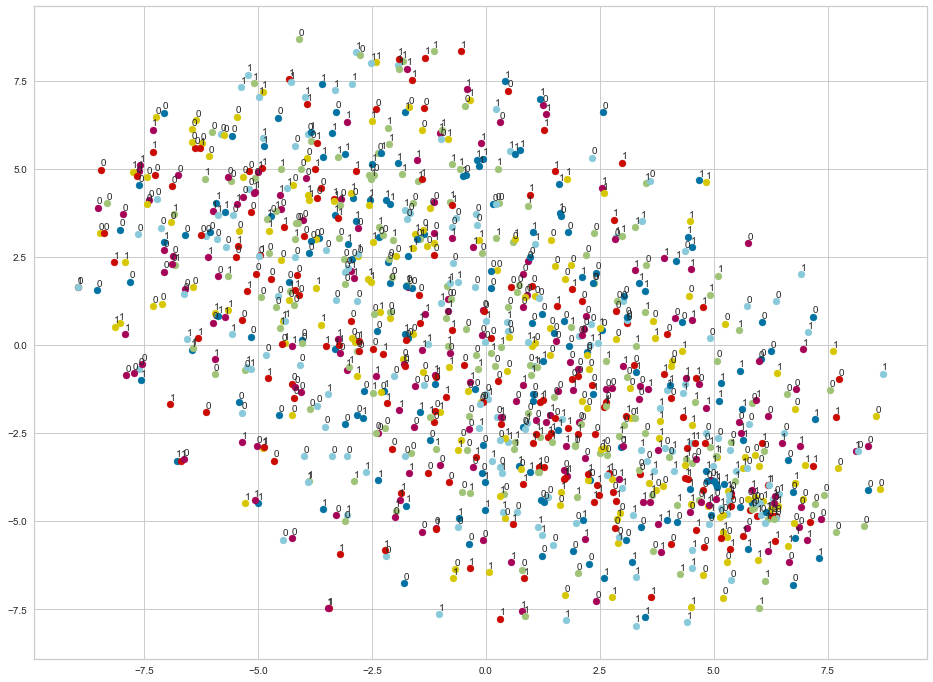

In [45]:
plt.figure(figsize=(16, 12)) 
for i in range(len(x)):
    plt.scatter(x[i],y[i])
    plt.annotate(viz_labels_test[i],
                 xy=(x[i], y[i]),
                 xytext=(5, 2),
                 textcoords='offset points',
                 ha='right',
                 va='bottom')
plt.show()